In [1]:
from ybco import *
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy.optimize import curve_fit
from scipy.io import savemat

import matplotlib.pyplot as plt
import numpy as np

In [2]:
%%time
import numpy as np

# Redefine bin boundaries
# bin_boundaries = np.arange(-10, 30, 0.1)
bin_boundaries = np.arange(5, 30, 0.2)
hist_start_bin = 1

# Define parameters
roi_x_start, roi_x_end = 50, 100
roi_y_start, roi_y_end = 0, 200
roi_coordinates = (roi_x_start, roi_x_end, roi_y_start, roi_y_end)

# Define your parameters for CDW_PP
# IPM_pos_Filter, Time_bin, TimeTool = [0.2,0.5],1.,[1.,0.005]
IPM_pos_Filter, Time_bin, TimeTool = [0.2,0.5], 2, [0.,0.005]

Run_Number = 195
ROI = [5,105,50,250]
Energy_Filter = [8.8,5]
I0_Threshold = 200

#from lcls.pvalues import compute_aggregate_pvals
from pvalues import compute_aggregate_pvals
from typing import Dict, List, Tuple, Any

CPU times: user 228 ms, sys: 66.9 ms, total: 295 ms
Wall time: 501 ms


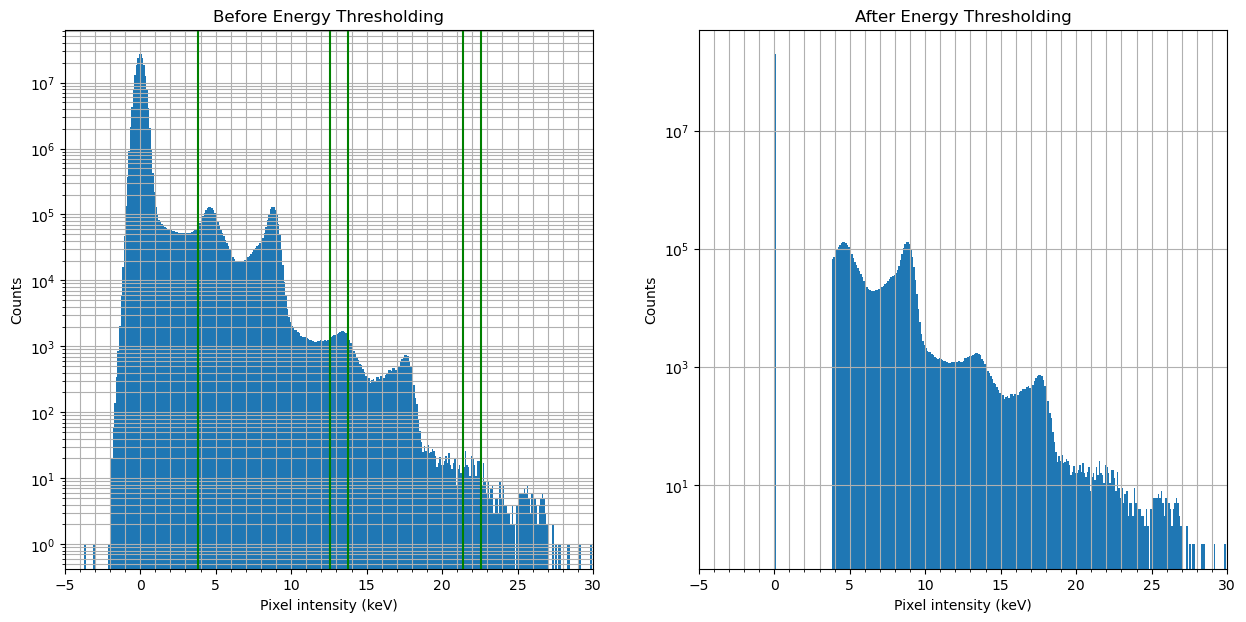

CPU times: user 27.7 s, sys: 22.5 s, total: 50.2 s
Wall time: 1min 28s


In [3]:
%%time

from pump_probe import CDW_PP

cdw_output = CDW_PP(Run_Number, ROI,
                    Energy_Filter, I0_Threshold,
                    IPM_pos_Filter, Time_bin, TimeTool)

from typing import List, Dict

def combine_stacks(stacks: List[Dict[float, np.ndarray]]) -> np.ndarray:
    """
    Combines multiple stacks into a single 3D numpy array by concatenating the 3D arrays from each stack.

    Parameters:
        stacks (List[Dict[float, np.ndarray]]): A list of stacks, where each stack is a dictionary mapping time delays to 3D numpy arrays.

    Returns:
        np.ndarray: A single 3D numpy array obtained by stacking the 3D arrays from all provided stacks.
    """
    # Extract all 3D arrays from each stack and concatenate them
    combined_array = np.concatenate([array for stack in stacks for array in stack.values()], axis=0)

    return combined_array

imgs_thresh = combine_stacks([cdw_output['stacks_off']])

In [5]:
%%time

# %run histogram_analysis.py
from lcls.histogram_analysis import *

from scipy.stats import wasserstein_distance
from scipy.ndimage import label

data = imgs_thresh#[:7000, ...]#load_data(filepath)
histograms = calculate_histograms(data, bin_boundaries, hist_start_bin)

threshold = .1
# Run the analysis
res = run_histogram_analysis(
    bin_boundaries = bin_boundaries, hist_start_bin = hist_start_bin,
    roi_x_start = roi_x_start, roi_x_end = roi_x_end, roi_y_start = roi_y_start,
    roi_y_end = roi_y_end, data = data,
    threshold = threshold)
signal_mask = res['signal_mask']

CPU times: user 39.3 s, sys: 4.59 s, total: 43.9 s
Wall time: 44.3 s


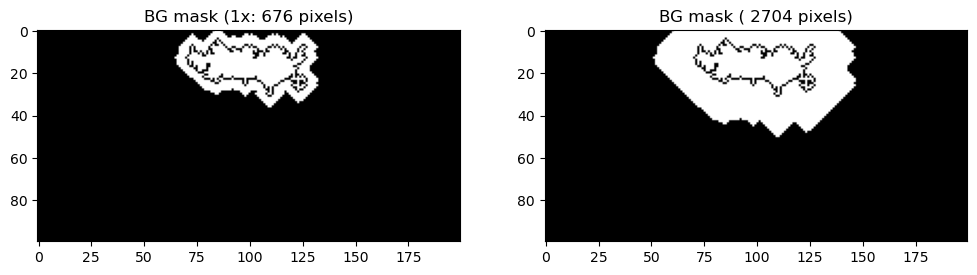

(676, (100, 200), (100, 200))

In [6]:
import histogram_analysis
# Counting the number of True pixels in the signal mask
true_pixels_count = np.sum(signal_mask)

# Test values for num_pixels
num_pixels_exact = true_pixels_count
num_pixels_double = 4 * true_pixels_count

# Running the create_continuous_buffer function with these test values
continuous_buffer_exact = histogram_analysis.create_continuous_buffer(signal_mask, num_pixels = num_pixels_exact)
continuous_buffer_double = histogram_analysis.create_continuous_buffer(signal_mask, num_pixels = num_pixels_double)

# Visualizing the results
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plotting the result with exact number of pixels
axes[0].imshow(continuous_buffer_exact | signal_mask, cmap='gray')
axes[0].set_title(f'BG mask (1x: {num_pixels_exact} pixels)')

# Plotting the result with double the number of pixels
axes[1].imshow(continuous_buffer_double | signal_mask, cmap='gray')
axes[1].set_title(f'BG mask ( {num_pixels_double} pixels)')

plt.show()

true_pixels_count, continuous_buffer_exact.shape, continuous_buffer_double.shape


In [11]:
from pump_probe import generate_plot_data

ImportError: cannot import name 'generate_plot_data' from 'pump_probe' (/sdf/data/lcls/ds/xpp/xppx1003221/results/ohoidn/Shift 4/pump_probe.py)

In [19]:
import pump_probe
from importlib import reload
reload(pump_probe)

<module 'pump_probe' from '/sdf/data/lcls/ds/xpp/xppx1003221/results/ohoidn/Shift 4/pump_probe.py'>

In [23]:
# Run histogram analysis to get the signal mask
analysis_results = run_histogram_analysis(histograms=histograms, bin_boundaries=bin_boundaries, 
                                          hist_start_bin=hist_start_bin, roi_x_start=roi_x_start, 
                                          roi_x_end=roi_x_end, roi_y_start=roi_y_start, roi_y_end=roi_y_end, 
                                          threshold=.1)
signal_mask = analysis_results['signal_mask']
cdw_data = pump_probe.generate_plot_data(cdw_output, signal_mask, bin_boundaries,
                              hist_start_bin, roi_coordinates, 4)

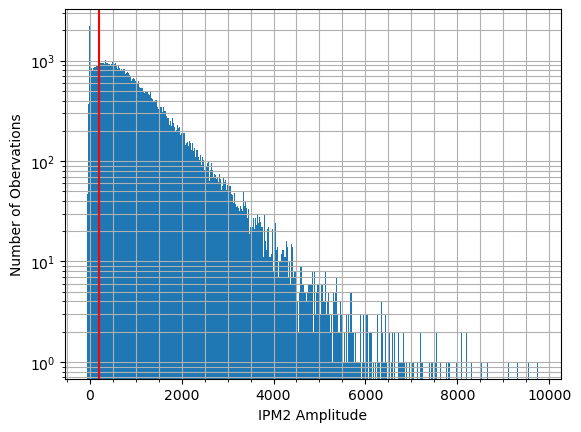

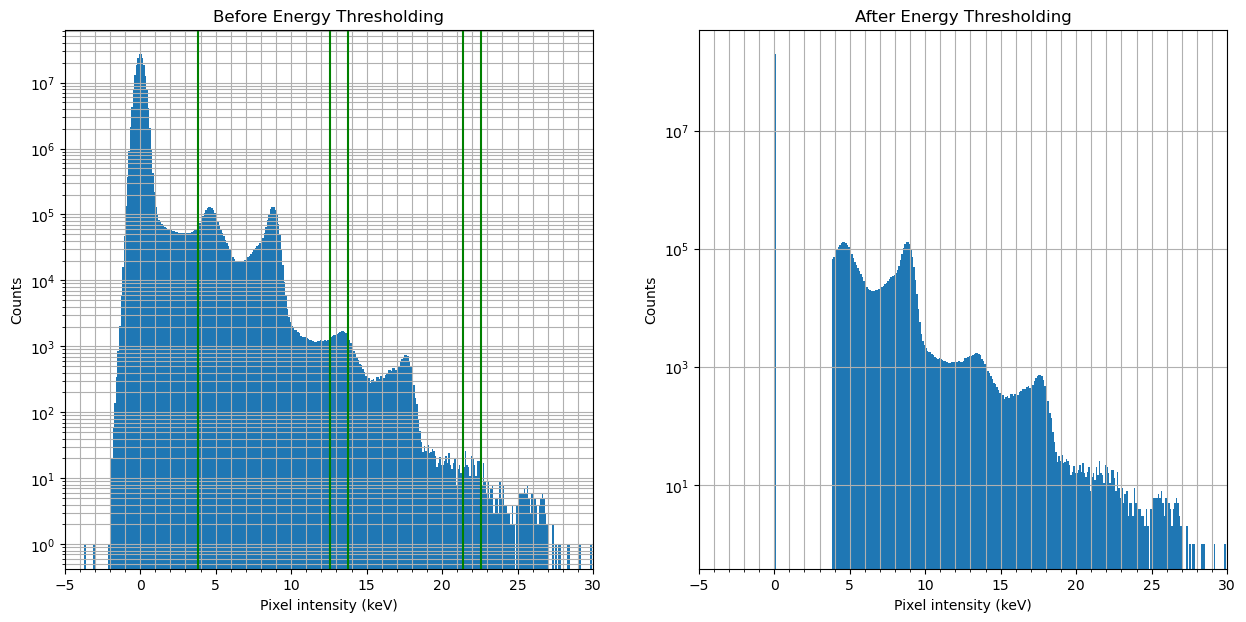

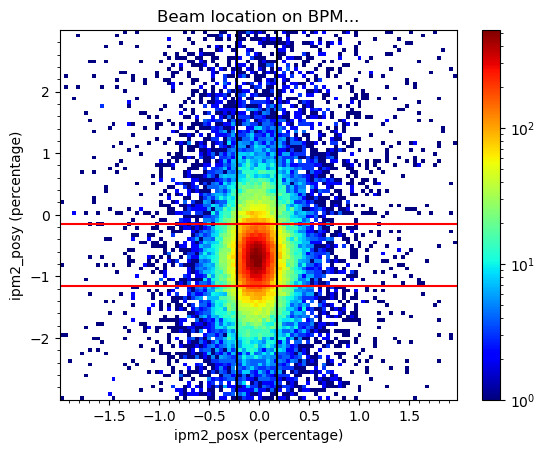

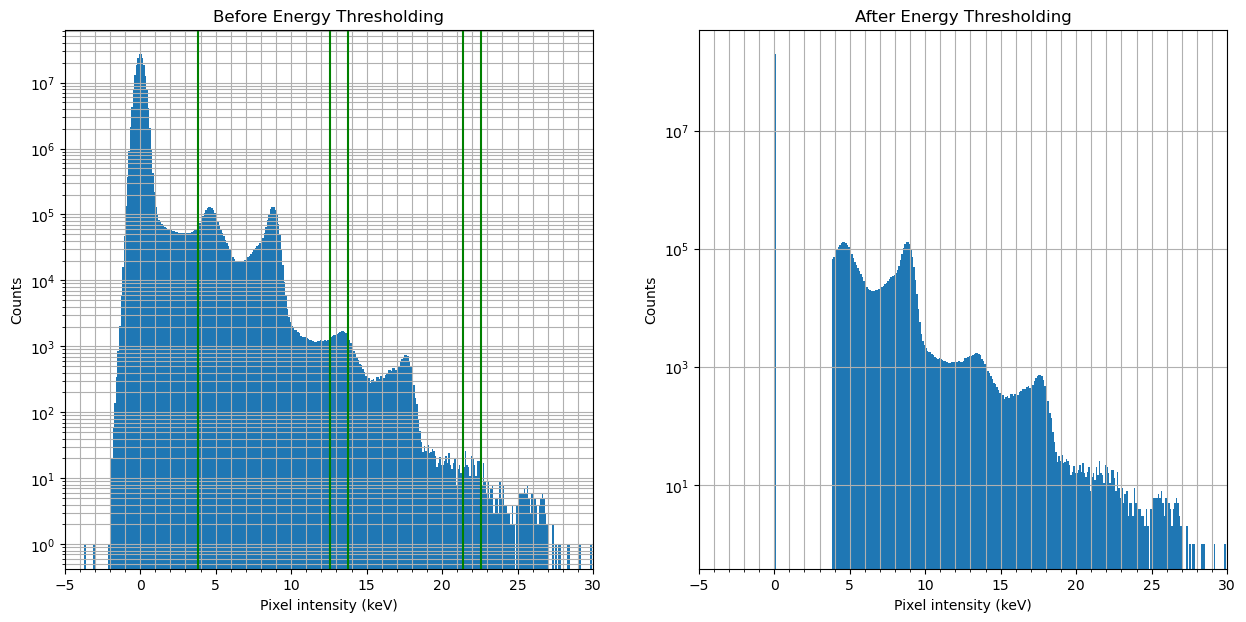

Working on the data of delay 24.00 ps...
Number of laser on and off events after filtering are 1080/869.
Working on the data of delay 26.00 ps...
Number of laser on and off events after filtering are 1677/1310.
Working on the data of delay 28.00 ps...
Number of laser on and off events after filtering are 1653/1335.
Working on the data of delay 30.00 ps...
Number of laser on and off events after filtering are 1648/1354.
Working on the data of delay 32.00 ps...
Number of laser on and off events after filtering are 1634/1293.
Working on the data of delay 34.00 ps...
Number of laser on and off events after filtering are 1663/1277.
Working on the data of delay 36.00 ps...
Number of laser on and off events after filtering are 1650/1294.
Working on the data of delay 38.00 ps...
Number of laser on and off events after filtering are 1629/1287.
Working on the data of delay 40.00 ps...
Number of laser on and off events after filtering are 1603/1342.
Working on the data of delay 42.00 ps...
Number

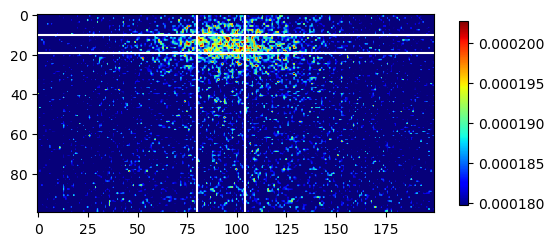

In [17]:
import ybco

aimg,simg = ybco.CDW_Optimizer(Run_Number, ROI, Energy_Filter, I0_Threshold)
delay,imgs_on,imgs_off  = ybco.CDW_PP(Run_Number, ROI, Energy_Filter, I0_Threshold, IPM_pos_Filter, Time_bin,TimeTool)
row1,row2,col1,col2 = 10,20,80,105  # boundaries of the ROI
mask = ybco.mask_go(aimg,row1,row2,col1,col2)

In [18]:
pp_lazy_data = pump_probe.generate_pp_lazy_data(imgs_on, imgs_off, mask, delay, False)

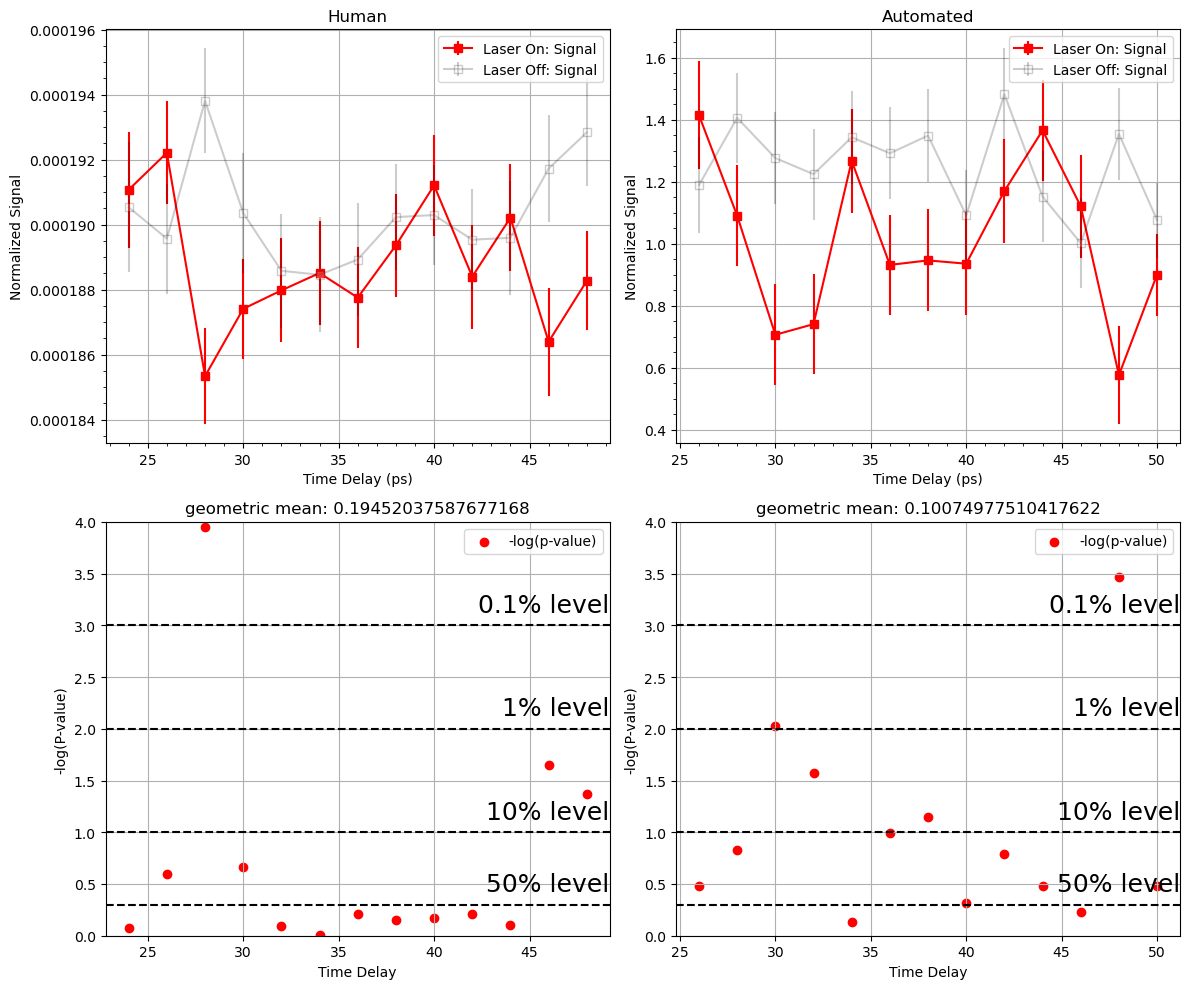

In [24]:
pump_probe.combine_plots(pp_lazy_data, cdw_data)